<a href="https://colab.research.google.com/github/Hari25483/Writing-Assistant-Tamil/blob/main/Seyon_Next_word_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
import matplotlib.pyplot as plt
import pickle
import heapq
from tensorflow.keras.optimizers import RMSprop
import bs4 as bs
import urllib.request
import re
import nltk

In [ ]:
path = '/content/quotes.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 191315


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)
print(words)

['0/']


In [ ]:
scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/History_of_India')
article = scrapped_data .read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text
print(article_text)

In [ ]:
# tokenizer = RegexpTokenizer(r'w+')
import nltk
nltk.download('punkt')
from nltk import word_tokenize
words = word_tokenize(text)
print(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['இந்திய', 'வரலாறு', '(', 'history', 'of', 'india', ')', 'என்பது', 'இந்தியத்', 'துணைக்கண்டத்தில்', 'வரலாற்றுக்', 'காலம்', 'முன்பு', 'வாழ்ந்த', 'மக்கள்', ',', 'அவர்தம்', 'சமுதாயம்', ',', 'சிந்து', 'சமவெளி', 'நாகரிகம்', ',', 'இந்தோ-ஆரியப்', 'பண்பாடு', 'உள்ளடக்கிய', 'வேதகால', 'நாகரிகம்', '[', '1', ']', 'தொடங்கி', 'இன்றுவரை', 'உள்ள', 'காலம்', 'அடங்கும்', '.', 'மேலும்', 'பல', 'கலாச்சாரங்களின்', 'சாரமாகவும்', 'பண்பாடுகளை', 'உள்வாங்கியும்', 'பிறந்த', 'இந்து', 'சமயம்', ',', 'அதன்', 'வளர்ச்சி', 'குறித்தும்', 'சிரமணா', 'இயக்கத்தின்', 'வளர்ச்சி', ',', 'சிரவுத்தா', 'பலிகளின்', 'வீழ்ச்சி', ',', 'சைனம்', ',', 'பௌத்தம்', ',', 'சைவம்', ',', 'வைணவம்', 'மற்றும்', 'சக்தி', 'வழிபாடு', 'இவைகளின்', 'வளர்ச்சி', ',', 'தாக்கம்', ',', '[', '2', ']', '[', '3', ']', 'மேலும்', 'இப்பகுதியில்', 'இரண்டாயிரம்', 'ஆண்டுகளாக', 'வாழ்ந்த', 'அரச', 'பரம்பரை', ',', 'பேரரசுகளின்', 'தோற்றம்', ',', 'தாக்கம்', ',', 'இடைகாலத்தில்', 'தோன்றிய', 'இந்து', 'மற்றும்', 'முகலாய', 'அரச', 'பரம்பரைகள்', 'குறித்த', 'தகவல்கள்', ',', 'பிற்காலத்

In [ ]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))
print(unique_word_index)

{'!': 0, '%': 1, "'": 2, "''": 3, "'அடர்": 4, "'இரவின்": 5, "'மகிழ்ச்சியானது": 6, '(': 7, ')': 8, '*': 9, '+': 10, ',': 11, '-': 12, '-இற்கும்': 13, '.': 14, '..': 15, '...': 16, '.சோழர்கள்': 17, '.மு': 18, '/': 19, '0': 20, '0.1': 21, '0.8': 22, '0.98': 23, '1': 24, '1,00,000': 25, '1,000': 26, '1,200': 27, '1,300': 28, '1,500': 29, '1,585': 30, '1,900': 31, '1.15': 32, '1.25': 33, '1.283': 34, '10': 35, '10-ஆம்': 36, '10.2': 37, '10.3': 38, '100': 39, '100,000': 40, '1000': 41, '1000-இற்கும்': 42, '1003': 43, '1003–1320': 44, '101': 45, '1017ல்': 46, '102': 47, '103': 48, '103.833': 49, '103.833°e\ufeff': 50, '103°50′e\ufeff': 51, '104': 52, '1040–1346': 53, '105': 54, '1058': 55, '106': 56, '107': 57, '1070ல்': 58, '1070–1230': 59, '1078–1434': 60, '108': 61, '1083–1323': 62, '109': 63, '10°n': 64, '10க்கு': 65, '11': 66, '11-12': 67, '11-ஆம்': 68, '110': 69, '1100': 70, '111': 71, '112': 72, '113': 73, '1130–1184': 74, '114': 75, '115': 76, '1153–1186': 77, '116': 78, '117': 79, '1

In [ ]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['இந்திய', 'வரலாறு', '(', 'history', 'of']
india


In [ ]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [ ]:
print(X[0][0])

[False False False ... False False False]


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [ ]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


190/190 [==============================] - 76s 385ms/step - loss: 7.9569 - accuracy: 0.1014 - val_loss: 7.8793 - val_accuracy: 0.1413
Epoch 2/2
190/190 [==============================] - 80s 424ms/step - loss: 7.0203 - accuracy: 0.1483 - val_loss: 8.3222 - val_accuracy: 0.0871


In [ ]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))



plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

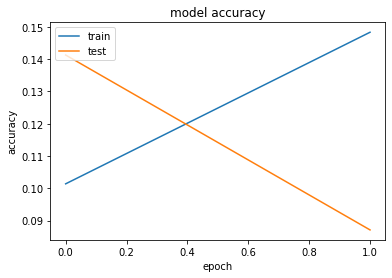

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

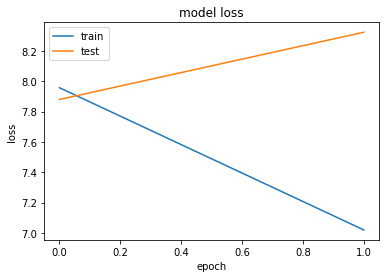

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
# prepare_input("It is not a lack".lower()))

def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

def predict_completions(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [ ]:
# quotes = [
#     "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
#     "That which does not kill us makes us stronger.",
#     "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
#     "And those who were seen dancing were thought to be insane by those who could not hear the music.",
#     "It is hard enough to remember my opinions, without also remembering my reasons for them!"
# ] 

In [ ]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

it is not a lack of love, but a lack of 
it


KeyError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
file = open("/content/quotes.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
print(data)

இந்திய வரலாறு (History of India) என்பது இந்தியத் துணைக்கண்டத்தில் வரலாற்றுக் காலம் முன்பு வாழ்ந்த மக்கள், அவர்தம் சமுதாயம், சிந்து சமவெளி நாகரிகம், இந்தோ-ஆரியப் பண்பாடு உள்ளடக்கிய வேதகால நாகரிகம்[1] தொடங்கி இன்றுவரை உள்ள காலம் அடங்கும். மேலும் பல கலாச்சாரங்களின் சாரமாகவும் பண்பாடுகளை உள்வாங்கியும் பிறந்த இந்து சமயம், அதன் வளர்ச்சி குறித்தும் சிரமணா இயக்கத்தின் வளர்ச்சி, சிரவுத்தா பலிகளின் வீழ்ச்சி, சைனம், பௌத்தம், சைவம், வைணவம் மற்றும் சக்தி வழிபாடு இவைகளின் வளர்ச்சி, தாக்கம்,[2][3] மேலும் இப்பகுதியில் இரண்டாயிரம் ஆண்டுகளாக வாழ்ந்த அரச பரம்பரை, பேரரசுகளின் தோற்றம், தாக்கம், இடைகாலத்தில் தோன்றிய இந்து மற்றும் முகலாய அரச பரம்பரைகள் குறித்த தகவல்கள், பிற்காலத்தில் வந்த ஐரோப்பிய வணிகர்கள், அதன் தொடர்ச்சியாக அமைந்த ஆங்கிலேய அரசு, அதன் தொடர்ச்சியாக எழுந்த விடுதலை இயக்கம், அதன் பின் நாடு பிரிவினை அடைந்து இந்தியக் குடியரசு பிறந்த வரை தகவல்கள் உள்ளிட்டவை அடங்கும்.[4] சுமார் 75,000 ஆண்டுகளுக்கு முன்பு இந்திய துணைக்கண்டத்தில் இன்றைய மனிதர்களின் உடற்கூறியல் வடிவத்தை ஒத்த மனிதர்களோ அல்லது 5,00,000 

In [ ]:
filename = "/content/[SubtitleTools.com] quotes.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = ''.join(c for c in raw_text if not c.isdigit())

#How many total characters do we have in our training text?
chars = sorted(list(set(raw_text))) #List of every character
print(chars)
print(raw_text)

article_text=raw_text

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
data1=word_tokenize(article_text)
print(data1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['\ufeffஇந்திய', 'வரலாறு', '(', 'History', 'of', 'India', ')', 'என்பது', 'இந்தியத்', 'துணைக்கண்டத்தில்', 'வரலாற்றுக்', 'காலம்', 'முன்பு', 'வாழ்ந்த', 'மக்கள்', ',', 'அவர்தம்', 'சமுதாயம்', ',', 'சிந்து', 'சமவெளி', 'நாகரிகம்', ',', 'இந்தோ-ஆரியப்', 'பண்பாடு', 'உள்ளடக்கிய', 'வேதகால', 'நாகரிகம்', '[', ']', 'தொடங்கி', 'இன்றுவரை', 'உள்ள', 'காலம்', 'அடங்கும்', '.', 'மேலும்', 'பல', 'கலாச்சாரங்களின்', 'சாரமாகவும்', 'பண்பாடுகளை', 'உள்வாங்கியும்', 'பிறந்த', 'இந்து', 'சமயம்', ',', 'அதன்', 'வளர்ச்சி', 'குறித்தும்', 'சிரமணா', 'இயக்கத்தின்', 'வளர்ச்சி', ',', 'சிரவுத்தா', 'பலிகளின்', 'வீழ்ச்சி', ',', 'சைனம்', ',', 'பௌத்தம்', ',', 'சைவம்', ',', 'வைணவம்', 'மற்றும்', 'சக்தி', 'வழிபாடு', 'இவைகளின்', 'வளர்ச்சி', ',', 'தாக்கம்', ',', '[', ']', '[', ']', 'மேலும்', 'இப்பகுதியில்', 'இரண்டாயிரம்', 'ஆண்டுகளாக', 'வாழ்ந்த', 'அரச', 'பரம்பரை', ',', 'பேரரசுகளின்', 'தோற்றம்', ',', 'தாக்கம்', ',', 'இடைகாலத்தில்', 'தோன்றிய', 'இந்து', 'மற்றும்', 'முகலாய', 'அரச', 'பரம்பரைகள்', 'குறித்த', 'தகவல்கள்', ',', 'பிற்காலத்தில்', 'வ

In [ ]:
file = open("/content/stopwords_tamil", "r", encoding = "utf8")
tamil_stopwords=[]
for line in file:
  line=line.replace('\n', '')
  tamil_stopwords.append(line)

print(len(word))
for element in tamil_stopwords:
    if element in word:
          # print(element)
          word.remove(element)

print(len(word))

# stop_words = set(stopwords.words('english'))

# filtered_sentence = [w for w in word if not w.lower() in stop_words]
  
filtered_sentence = []
  
for w in data1:
    if w not in tamil_stopwords:
        filtered_sentence.append(w)
  
print(word)
print(len(filtered_sentence))

NameError: ignored

In [ ]:
print(data1)
article_text = ""

for p in data1:
    article_text += p+" "

['\ufeffஇந்திய', 'வரலாறு', '(', 'History', 'of', 'India', ')', 'என்பது', 'இந்தியத்', 'துணைக்கண்டத்தில்', 'வரலாற்றுக்', 'காலம்', 'முன்பு', 'வாழ்ந்த', 'மக்கள்', ',', 'அவர்தம்', 'சமுதாயம்', ',', 'சிந்து', 'சமவெளி', 'நாகரிகம்', ',', 'இந்தோ-ஆரியப்', 'பண்பாடு', 'உள்ளடக்கிய', 'வேதகால', 'நாகரிகம்', '[', ']', 'தொடங்கி', 'இன்றுவரை', 'உள்ள', 'காலம்', 'அடங்கும்', '.', 'மேலும்', 'பல', 'கலாச்சாரங்களின்', 'சாரமாகவும்', 'பண்பாடுகளை', 'உள்வாங்கியும்', 'பிறந்த', 'இந்து', 'சமயம்', ',', 'அதன்', 'வளர்ச்சி', 'குறித்தும்', 'சிரமணா', 'இயக்கத்தின்', 'வளர்ச்சி', ',', 'சிரவுத்தா', 'பலிகளின்', 'வீழ்ச்சி', ',', 'சைனம்', ',', 'பௌத்தம்', ',', 'சைவம்', ',', 'வைணவம்', 'மற்றும்', 'சக்தி', 'வழிபாடு', 'இவைகளின்', 'வளர்ச்சி', ',', 'தாக்கம்', ',', '[', ']', '[', ']', 'மேலும்', 'இப்பகுதியில்', 'இரண்டாயிரம்', 'ஆண்டுகளாக', 'வாழ்ந்த', 'அரச', 'பரம்பரை', ',', 'பேரரசுகளின்', 'தோற்றம்', ',', 'தாக்கம்', ',', 'இடைகாலத்தில்', 'தோன்றிய', 'இந்து', 'மற்றும்', 'முகலாய', 'அரச', 'பரம்பரைகள்', 'குறித்த', 'தகவல்கள்', ',', 'பிற்காலத்தில்', 'வ

In [ ]:
print(article_text)
len(article_text)
data=article_text


﻿இந்திய வரலாறு ( History of India ) என்பது இந்தியத் துணைக்கண்டத்தில் வரலாற்றுக் காலம் முன்பு வாழ்ந்த மக்கள் , அவர்தம் சமுதாயம் , சிந்து சமவெளி நாகரிகம் , இந்தோ-ஆரியப் பண்பாடு உள்ளடக்கிய வேதகால நாகரிகம் [ ] தொடங்கி இன்றுவரை உள்ள காலம் அடங்கும் . மேலும் பல கலாச்சாரங்களின் சாரமாகவும் பண்பாடுகளை உள்வாங்கியும் பிறந்த இந்து சமயம் , அதன் வளர்ச்சி குறித்தும் சிரமணா இயக்கத்தின் வளர்ச்சி , சிரவுத்தா பலிகளின் வீழ்ச்சி , சைனம் , பௌத்தம் , சைவம் , வைணவம் மற்றும் சக்தி வழிபாடு இவைகளின் வளர்ச்சி , தாக்கம் , [ ] [ ] மேலும் இப்பகுதியில் இரண்டாயிரம் ஆண்டுகளாக வாழ்ந்த அரச பரம்பரை , பேரரசுகளின் தோற்றம் , தாக்கம் , இடைகாலத்தில் தோன்றிய இந்து மற்றும் முகலாய அரச பரம்பரைகள் குறித்த தகவல்கள் , பிற்காலத்தில் வந்த ஐரோப்பிய வணிகர்கள் , அதன் தொடர்ச்சியாக அமைந்த ஆங்கிலேய அரசு , அதன் தொடர்ச்சியாக எழுந்த விடுதலை இயக்கம் , அதன் பின் நாடு பிரிவினை அடைந்து இந்தியக் குடியரசு பிறந்த வரை தகவல்கள் உள்ளிட்டவை அடங்கும் . [ ] சுமார் , ஆண்டுகளுக்கு முன்பு இந்திய துணைக்கண்டத்தில் இன்றைய மனிதர்களின் உடற்கூறியல் வடிவத்தை ஒத்த மனித

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[3141, 112, 953, 510, 646, 37, 287, 647, 1396, 63, 345, 346, 20, 1397, 3142]

In [ ]:
len(sequence_data)


20027

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8506


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  20024


array([[3141,  112,  953,  510],
       [ 112,  953,  510,  646],
       [ 953,  510,  646,   37],
       [ 510,  646,   37,  287],
       [ 646,   37,  287,  647],
       [  37,  287,  647, 1396],
       [ 287,  647, 1396,   63],
       [ 647, 1396,   63,  345],
       [1396,   63,  345,  346],
       [  63,  345,  346,   20]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])


Data:  [[3141  112  953]
 [ 112  953  510]
 [ 953  510  646]
 [ 510  646   37]
 [ 646   37  287]
 [  37  287  647]
 [ 287  647 1396]
 [ 647 1396   63]
 [1396   63  345]
 [  63  345  346]]
Response:  [ 510  646   37  287  647 1396   63  345  346   20]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dropout(0.2))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

DONT RUN (STACKED LAYERS0

In [ ]:
# from keras.layers import Dense, Dropout, LSTM
# from keras.models import Sequential
# from tensorflow.keras.optimizers import RMSprop

# # model = Sequential()
# # model.add(Embedding(vocab_size, 10, input_length=3))
# # model.add(LSTM(1000, return_sequences=True))
# # model.add(LSTM(1000))
# # model.add(Dense(1000, activation="relu"))
# # model.add(Dense(vocab_size, activation="softmax"))

# model = Sequential()
# model.add(Embedding(vocab_size, 10, input_length=3))
# model.add(LSTM(1000, return_sequences=True))
# # model.add(LSTM(128, input_shape=(seq_length, n_vocab), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(128))
# model.add(Dropout(0.2))
# model.add(Dense(vocab_size, activation='softmax'))

# optimizer = RMSprop(lr=0.01)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer)
# model.summary()

In [ ]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 3, 10)             85060     
                                                                 
 lstm_7 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_8 (LSTM)               (None, 1000)              8004000   
                                                                 
 dropout_6 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 8506)              8514506   
                                                                 
Total params: 21,648,566
Trainable params: 21,648,566


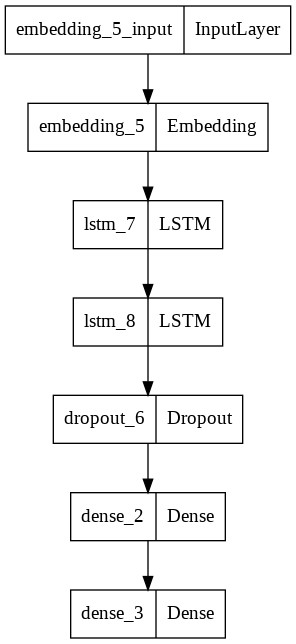

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
history=model.fit(X, y, epochs=100, batch_size=64, callbacks=[checkpoint])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.plpthistory.history['loss'])
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochpd.DataFrame(history.history).plot(figsize=(8,5))
plt.show(')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: தென்னாசியாவில் ஆரம்பகாலங்களில் கண்டு பிடிக்கப்பட்ட
['ஆரம்பகாலங்களில்', 'கண்டு', 'பிடிக்கப்பட்ட']
தொல்பொருள்
Enter your line: தென்னாசியாவில் ஆரம்பகாலங்களில் கண்டு 
['ஆரம்பகாலங்களில்', 'கண்டு', '']
Error occurred:  in user code:

    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_tra

KeyboardInterrupt: ignored

Other Language Prediciton

﻿இந்திய வரலாறு (history of india) என்பது இந்தியத் துணைக்கண்டத்தில் வரலாற்றுக் காலம் முன்பு வாழ்ந்த மக்கள், அவர்தம் சமுதாயம், சிந்து சமவெளி நாகரிகம், இந்தோ-ஆரியப் பண்பாடு உள்ளடக்கிய வேதகால நாகரிகம்[1] தொடங்கி இன்றுவரை உள்ள காலம் அடங்கும். மேலும் பல கலாச்சாரங்களின் சாரமாகவும் பண்பாடுகளை உள்வாங்கியும் பிறந்த இந்து சமயம், அதன் வளர்ச்சி குறித்தும் சிரமணா இயக்கத்தின் வளர்ச்சி, சிரவுத்தா பலிகளின் வீழ்ச்சி, சைனம், பௌத்தம், சைவம், வைணவம் மற்றும் சக்தி வழிபாடு இவைகளின் வளர்ச்சி, தாக்கம்,[2][3] மேலும் இப்பகுதியில் இரண்டாயிரம் ஆண்டுகளாக வாழ்ந்த அரச பரம்பரை, பேரரசுகளின் தோற்றம், தாக்கம், இடைகாலத்தில் தோன்றிய இந்து மற்றும் முகலாய அரச பரம்பரைகள் குறித்த தகவல்கள், பிற்காலத்தில் வந்த ஐரோப்பிய வணிகர்கள், அதன் தொடர்ச்சியாக அமைந்த ஆங்கிலேய அரசு, அதன் தொடர்ச்சியாக எழுந்த விடுதலை இயக்கம், அதன் பின் நாடு பிரிவினை அடைந்து இந்தியக் குடியரசு பிறந்த வரை தகவல்கள் உள்ளிட்டவை அடங்கும்.[4]
சுமார் 75,000 ஆண்டுகளுக்கு முன்பு இந்திய துணைக்கண்டத்தில் இன்றைய மனிதர்களின் உடற்கூறியல் வடிவத்தை ஒத்த மனிதர்களோ அல்லது 5,00,000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


(18775, 60, 143)
(18775, 143)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               139264    
                                                                 
 dense_2 (Dense)             (None, 143)               18447     
                                                                 
Total params: 157,711
Trainable params: 157,711
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
147/147 [==============================] - ETA: 0s - loss: 3.0315
Epoch 1: loss improved from inf to 3.03152, saving model to saved_weights

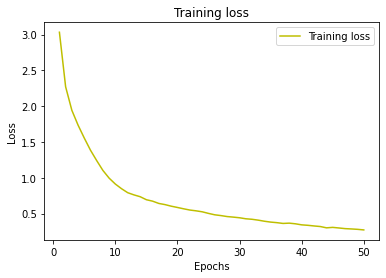

----- Seed for our text prediction: "், பல பத்தாண்டு கால அதிகாரப்பரவலாக்கல் கோரிக்கைகளைத் தொடர்ந்"
து சிங்கள் பண்டனர்.
ஆக்காலத்தில் இராமாயணது கிளி மறைறும்  மல்ணவை இவர்க்சியைப் பண்பியது நூற்கா மூற்றும் மயனை இலக்குவே எாயணத்தும் அரசிங்கது, ஆயும் புதிகளில் லம் நிலைக்கும் இந்தியாவில் கலக்கிய அதிக்கப்படுவின் இருந்ததுக்காக தமிழ்ிய நாட்டின் சோற்கி அரசாூன முனர், பிரித்தார்கள் விருப்பிருந்து நோற்று ஆண்டு தோற்றுவானது. ா[ மொழியான அரசிய் தனைந்து கவுவேறு இற்தனர் ையொண்டு வரங்கழ்வந்து பருத்துக்குள் புரிம் சீர்


In [ ]:
# https://youtu.be/zyCpntcVKSo


"""
@author: Sreenivas Bhattiprolu

Download text file from: http://www.gutenberg.org/ebooks/236
"""

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import random
import sys

#LOAD TEXT
#Save notepad as UTF-8 (select from dropdown during saving)
filename = "/content/[SubtitleTools.com] quotes.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
print(raw_text[0:1000])

#CLEAN TEXT
#Remove numbers
raw_text = ''.join(c for c in raw_text if not c.isdigit())

#How many total characters do we have in our training text?
chars = sorted(list(set(raw_text))) #List of every character

#Character sequences must be encoded as integers. 
#Each unique character will be assigned an integer value. 
#Create a dictionary of characters mapped to integer values
char_to_int = dict((c, i) for i, c in enumerate(chars))

#Do the reverse so we can print our predictions in characters and not integers
int_to_char = dict((i, c) for i, c in enumerate(chars))

# summarize the data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters in the text; corpus length: ", n_chars)
print("Total Vocab: ", n_vocab)


########################
#Now that we have characters we can create input/output sequences for training
#Remember that for LSTM input and output can be sequences... hence the term seq2seq


seq_length = 60  #Length of each input sequence
step = 10   #Instead of moving 1 letter at a time, try skipping a few. 
sentences = []    # X values (Sentences)
next_chars = []   # Y values. The character that follows the sentence defined as X
for i in range(0, n_chars - seq_length, step):  #step=1 means each sentence is offset just by a single letter
    sentences.append(raw_text[i: i + seq_length])  #Sequence in
    next_chars.append(raw_text[i + seq_length])  #Sequence out
n_patterns = len(sentences)    
print('Number of sequences:', n_patterns)

#Have a look at sentences and next_chars to see the continuity...
############################

#Just like time series, X is the sequence / sentence and y is the next value
#that comes after the sentence... 

# reshape input to be [samples, time steps, features]

#time steps = sequence length
#features = numbers of characters in our vocab (n_vocab)
#Vectorize all sentences: there are n_patterns sentences.
#For each sentence we have n_vocab characters available for seq_length
#Vectorization returns a vector for all sentences indicating the presence or absence 
#of a character. 

x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1
    
print(x.shape)
print(y.shape)

print(y[0:10])

##################################################
#Basic model with one LSTM
# build the model: a single LSTM

model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

######################################
# Deeper model woth 2 LSTM
#To stack LSTM layers, we need to change the configuration of the prior 
#LSTM layer to output a 3D array as input for the subsequent layer.
#We can do this by setting the return_sequences argument on the layer to True 
#(defaults to False). This will return one output for each input time step and provide a 3D array.
#Below is the same example as above with return_sequences=True.

#model = Sequential()
#model.add(LSTM(128, input_shape=(seq_length, n_vocab), return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(128))
#model.add(Dropout(0.2))
#model.add(Dense(n_vocab, activation='softmax'))

#optimizer = RMSprop(lr=0.01)
#model.compile(loss='categorical_crossentropy', optimizer=optimizer)
#model.summary()


###############


# define the checkpoint
from keras.callbacks import ModelCheckpoint

filepath="saved_weights/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]


# Fit the model

history = model.fit(x, y,
          batch_size=128,
          epochs=50,   
          callbacks=callbacks_list)

model.save('my_saved_weights_jungle_book_50epochs.h5')
##########################################################################

from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


####################################################################
###################################
#Generate characters 
#We must provide a sequence of seq_lenth as input to start the generation process

#The prediction results is probabilities for each of the 48 characters at a specific
#point in sequence. Let us pick the one with max probability and print it out.
#Writing our own softmax function....

def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1) 
    return np.argmax(probas)



#Prediction
# load the network weights
filename = "my_saved_weights_jungle_book_50epochs.h5"
model.load_weights(filename)

#Pick a random sentence from the text as seed.
start_index = random.randint(0, n_chars - seq_length - 1)

#Initiate generated text and keep adding new predictions and print them out
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print('----- Seed for our text prediction: "' + sentence + '"')
#sys.stdout.write(generated)


for i in range(400):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

############################################


In [ ]:
for i in range(45):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()


ரசு ஆக்கப்படுத்தி மூல்குப் பெரும்பாலைய கருத்த
